# Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

### Company Background

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

### Project Goal

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:

- Age: age of the patient [years]

- Sex: sex of the patient [M: Male, F: 
Female]

- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- RestingBP: resting blood pressure [mm Hg]

- Cholesterol: serum cholesterol [mm/dl]

- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

- Oldpeak: oldpeak = ST [Numeric value measured in depression]

- ST_Slope: the slope of the peak exercise

- ST segment [Up: upsloping, Flat: flat, Down: downsloping]

- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
#import the needed libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np   # for numerical computations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Loading the Dataset

In [2]:
#read in the data
heart_disease = pd.read_csv('heart_disease_prediction.csv')

### Exploratory Analysis

We will eplore the data by examining the first 5 rows. This will enable us determine what the dataset looks like.

In [3]:
#print out the first 5 rows of the dataset
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#print out the number of features in the dataset
print("Number of features: ", heart_disease.shape[1])

#print out the number of observation in the dataset
print("Number of observations: ", heart_disease.shape[0])

Number of features:  12
Number of observations:  918


To distinguish between numerical and categorical columns in the dataset, we can utilize the dtypes attributes of Pandas dataframes. This attribute provides the datatype information for each column

In [5]:
#printout the datatype for each column
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
# Generate descriptive statistics for the dataset
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Observations

Based on the descriptive statistics, here are some of the observations that we can make:

1. The average age of patients is ~53 years.

2. The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
3. RestingBP and Cholesterol have a minimum value of zero which is abnormal and could be an indication of incorrect data.
4. There are no missing values in these columns.

We'll explore the categorical features next, but we'll rely on creating visualizations to understand how the data is distributed.

In [7]:
#plot  a bar chart for all categorical columns
categorical_column = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
  
# Display the value counts for each categorical column
for column in categorical_column:
    # Print the value counts of the column
    print(heart_disease[column].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
1    508
0    410
Name: HeartDisease, dtype: int64


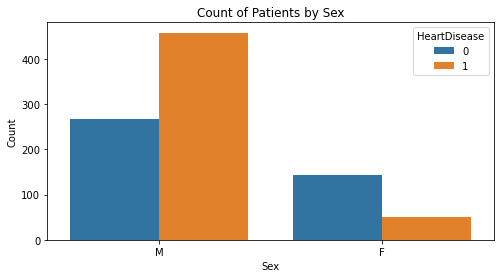

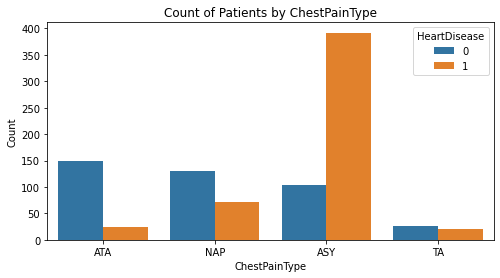

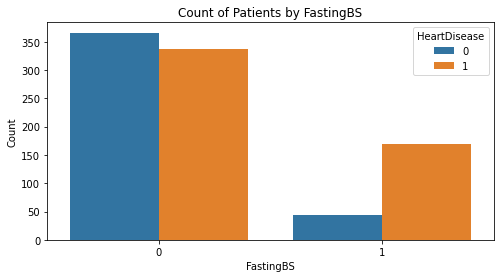

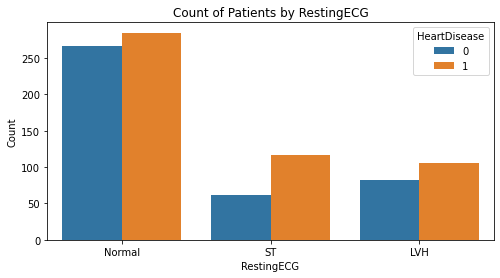

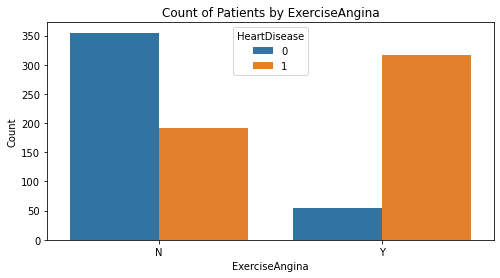

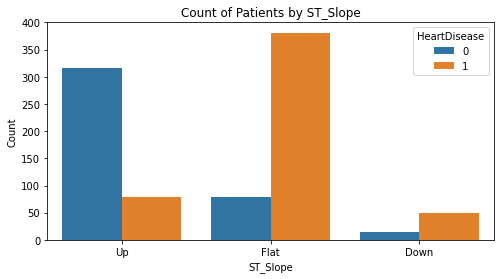

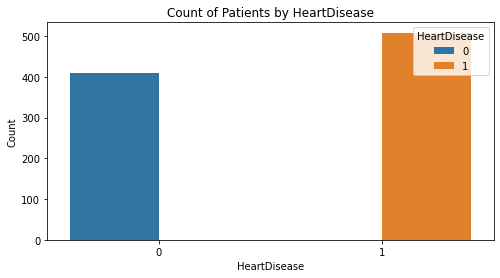

In [8]:
#plot  a bar chart for all categorical columns grouped by heart disease
for column in categorical_column:
    plt.figure(figsize=(8,4))
    sns.countplot(data=heart_disease, x=column, hue ='HeartDisease')
    plt.title(f'Count of Patients by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### Observations

Based on the bar charts displayed above, here are some of the observations:
1. 410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed.
2. There are more male patients (725) than females (193)
3. The males are most likely to have the heart disease compared to the females.
4. The 'ASY' ChestPain type has a higher count (392) for patients with the heart disease.
5. The 'Flat' ST_Slope has a higher count for patients with the heart disease.
6. The 'Y' ExerciseAngina has a higher count for patients with the heart disease.

In [9]:
# Filter the dataset for patients with heart disease
heart_disease_patients = heart_disease[heart_disease['HeartDisease'] == 1]

# Calculate the percentage of patients with heart disease who are male and over 50 years old
male_over50 = heart_disease_patients[(heart_disease_patients['Sex'] == 'M') & (heart_disease_patients['Age'] > 50)]
percentage_male_over_50 = (len(male_over50) / len(heart_disease_patients)) * 100

median_age_heart_disease = np.median(heart_disease_patients['Age'])

print(f"Percentage of patients with heart disease who are male and over 50 years old: {percentage_male_over_50:.2f}%")
print(f"Median age of patients diagnosed with heart disease: {median_age_heart_disease:.1f} years")

Percentage of patients with heart disease who are male and over 50 years old: 67.72%
Median age of patients diagnosed with heart disease: 57.0 years


In [10]:
#count the number of roles with 0 values for RestingBP and Cholesterol  
restingbP0 = len(heart_disease[heart_disease['RestingBP']==0])
print("The number of rows that have zero value for RestingBP is", restingbP0)

cholesterol0 = len(heart_disease[heart_disease['Cholesterol']==0])
print("The number of rows that have zero value for Cholesterol is", cholesterol0)

The number of rows that have zero value for RestingBP is 1
The number of rows that have zero value for Cholesterol is 172


As observed above, the RestingBP has only '1' zero value while the Cholesterol column has '172' zero values. we would be using the median method to handle the zero values.

In [11]:
#calculate the median for the cholesterol column
cholesterol_median = heart_disease_patients['Cholesterol'].median()

# replace the zero values with the median
heart_disease['Cholesterol']= heart_disease['Cholesterol'].replace([0],[cholesterol_median])

#calculate the median for the RestingBP column
resting_median = heart_disease_patients['RestingBP'].median()

# replace the zero values with the median
heart_disease['RestingBP']= heart_disease['RestingBP'].replace([0],[resting_median])

In [12]:
heart_disease.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540305,239.457516,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989941,54.398724,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Now our data is clean with no missing values. We can now select features for our model.

### Feauture Selection

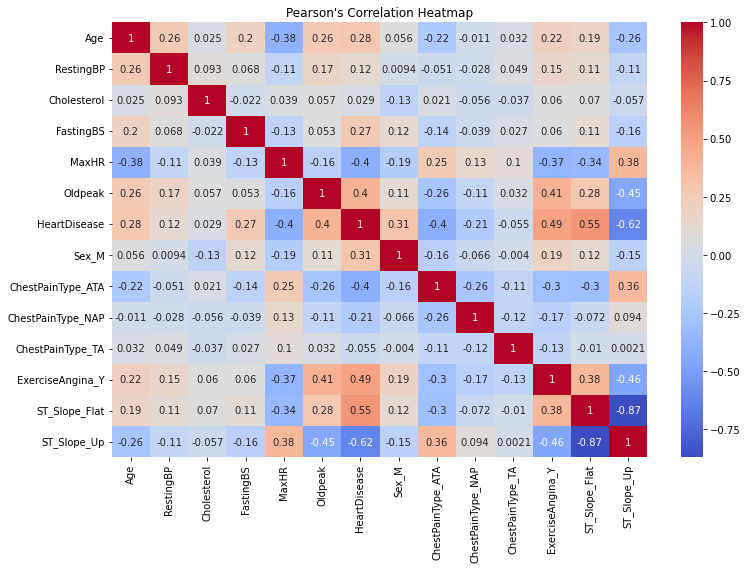

In [14]:
#covert the categorical features into dummy variables
categorical_features = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
heart_disease_encoded = pd.get_dummies(heart_disease, columns=categorical_features, drop_first=True)

# Create Pearson's correlation heat map
correlation_matrix = heart_disease_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Pearson's Correlation Heatmap")
plt.show()


### Observations

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:
1. Oldpeak
2. Sex_M: It has a relatively low value for the coefficient but we will take it into account.
3. ExerciseAngina_Y
4. ST_Slope_Flat
5. ST_Slope_Up

We could also select MaxHR or ChestPainType_ATA.

### Building A Classifier 

In [15]:
#split the data into train and validation set
x = heart_disease_encoded[['Oldpeak','MaxHR','ChestPainType_ATA','Sex_M','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']]
y = heart_disease_encoded['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state = 417)

features_m = ['Oldpeak','MaxHR','ChestPainType_ATA','Sex_M','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']

#create an instance of the knn classifier 
for i in features_m:
    knn = KNeighborsClassifier(n_neighbors=5)
    
    #fit the training data one feature at a time
    knn.fit(X_train[[i]],y_train)
    
    #evaluate the model on validation set
    val_accuracy = knn.score(X_val[[i]], y_val)
    print(f"The accuracy for {i} is {val_accuracy}")


The accuracy for Oldpeak is 0.7065217391304348
The accuracy for MaxHR is 0.592391304347826
The accuracy for ChestPainType_ATA is 0.6630434782608695
The accuracy for Sex_M is 0.46195652173913043
The accuracy for ExerciseAngina_Y is 0.7119565217391305
The accuracy for ST_Slope_Flat is 0.7989130434782609
The accuracy for ST_Slope_Up is 0.8206521739130435


From the results of our accuracy, we can see that the model fitted with the 'ST_Slope_Up' feature has the best performance with an accuracy of 82%. This indicates that the presence of a UP ST slope during exercise electrocardiography may be a strong indicator of heart disease.

In [16]:
#create an instance of the scaler and transform the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features_m])
X_val_scaled = scaler.transform(X_val[features_m])

#create an instance of the knn model and fit the scaled training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

#evaluate the model on the scaled validation set
val_accuracy = knn.score(X_val_scaled, y_val)
print(f"The model accuracy is {val_accuracy}")


The model accuracy is 0.7934782608695652


### Observations

Compared to our previous models, this model performed fairly with an accuracy of 80%. It is not a great improvement on the model trained on just the ST_Slope_Flat feature but it is a good start. Overall, scaling the features proved to be a crucial step in enhancing the model's performance, demonstrating the importance of appropriate data preprocessing techniques in machine learning workflows. 

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

## Hyperparameter Tuning

In [17]:
#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 417)

#scale the training set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

param_dict ={"n_neighbors": range(1, 10),'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree']}

#create a GridSearcCV instance
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_dict, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

#print out the best score
best_score = knn_grid.best_score_
print(f"The best score is {best_score}")

#print out the best parameters
best_params = knn_grid.best_params_
print(f"The best parameters are {best_params}")


The best score is 0.8296710465007922
The best parameters are {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}


### Observations

The accuracy of this model is only slightly better.

These parameters indicate that the K-nearest neighbors (KNN) classifier achieved the best performance using the following hyperparameters:

1. algorithm: The algorithm used to compute the nearest neighbors. In this case, 'balltree' was the best. 
2. metric: The distance metric used to compute the distances between instances. In this case, 'euclidean' was the best metric.
3. n_neighbors: The number of neighbors to consider when making predictions. The optimal value in this case was 5.
4. weights: The weight function used in prediction. 'uniform' means that all neighbors are weighted equally.

These results indicate the optimal configuration for the KNN classifier based on the grid search with the provided parameter options and scoring metric. 

## Model Evaluation on Test Set

We'll now evaluate this model on our test set.

In [18]:
#scale the testset features
X_test_scaled = scaler.transform(X_test)

# Get the best estimator from GridSearchCV
best_model = knn_grid.best_estimator_

# Predict the model's output on the test set
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy is {:.2f}%".format(accuracy * 100))


Test Set Accuracy is 82.07%


### Model Performance

After evaluating the model on the test set, we obtained an accuracy of 82.07%. This accuracy represents the proportion of correctly classified instances in the test set.

### Evaulation of Model Performance

An accuracy of 80.4% on the test datset is a good starting point but the lower performance compared to the training set suggests potential overfitting and could also be attributed to the randomness in the training process and the specific instances present in the test set. 

### Deploymment of Model in a Real-World Heathcare Setting

Deploying a K-NN model with anaccuracy of 80.4% in a real-world health care setting has its pros and cons. They include but not limited to: 
1. **No Training Phase**: K-NN doesnt require a training phase, making it adaptable to changing healthcare daa without the need for continous retraining.
2. **Quick Adaptation**: K-NN can quikly incorporate new data points, which is beneficial in healthcare where patient data is constantly updated. 
3. **Class Imbalance**: Healthcare datasets often have imbalanced class distributions, which K-NN might struggle with, leading to biased predictions. 
4. **Lack of Advanced Patterns**: K-NN might not capture complex patterns as effectively as more advanced algorithms, impacting its accuracy.

In a real world healthcare setting, the 80.4% accuracy of the K-NN model could be considered decent but it's important to thoroughly assess the trade-offs and limitations. The model could be valuable for preliminary analysis or as part of a broader decision support system, but it might not be suitable for critical situations without further optimization and testing against other advanced algorithms. 

### Potential Improvement

To improve the performance of the K-Nearest Neighbors and address the accuracy gap between training test datasets, the following improvements can be considered:
1. **Feature Engineering**: Analyzing relevant features might enhance the model's ability to capture underlying patterns in the data. 
2. **Hyperparameter Tuning**: Experiment with different values of the K parameter and explore alternative distance metrics to find the configuration that yields the best results on the test data. 
3. **Data Augmentation**: Generate augmented data by introducing controlled variations to existing data points, which can help the model generalize better. 

While the model's accuracy of 80.43% is quits promising, it's necessary to evaluate other metrics, perform rigorous testing, and consider the specific needs and constraints of the healthcare application before deploying the model